# Online Retail Data Set 

** Abstract **: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

### Data Set Characteristics:  

1. Multivariate, Sequential, Time-Series
2. Number of Instances: 541909
3. Area: Business
4. Attribute Characteristics: Integer, Real
5. Number of Attributes: 8
6. Date Donated: 2015-11-06
7. Associated Tasks: Classification, Clustering


#### Source: 
Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


#### Attribute Information:

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. Description: Product (item) name. Nominal. 
4. Quantity: The quantities of each product (item) per transaction. Numeric.	
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
8. Country: Country name. Nominal, the name of the country where each customer resides.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools
import nltk
nltk.download('punkt')
import wordcloud
%matplotlib inline
plt.style.use('fivethirtyeight')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
path ="/Data Science Python Programs/Practice Python/UNSUPERVISED LEARNING/Online Retail.csv"
class DataFrame_Loader():
    data = path
    
    def __init__(self,encoding):
        self.encoding=encoding
        
        print("Loadind DataFrame")
        
    def read_csv(self,data,encoding='unicode_escape'):
        self.df = pd.read_csv(data,encoding='unicode_escape')
        
    def load_csv(self):
        return self.df

In [3]:
data = DataFrame_Loader(1)

Loadind DataFrame


In [4]:
data.read_csv(path)

In [5]:
df=data.load_csv()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [6]:
class DataFrame_Info():

    def __init__(self):
        
        print("DataFrame Information object created")
        
    def Feature_information(self,df):
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    def Generate_Schema(self,data):
        
        feature_dtypes=data.dtypes
        self.missing_values=self.__get_missing_values(data)

        print("=" * 110)

        print("{:16} {:16} {:20} {:16}".format("Feature Name".upper(),
                                            "Data Type".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:5]:
                print(v, end=",")
            print()

        print("="*110)
        
    def Agg_Tabulation(self,data):
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def drop_duplicates(self,data):
        print('Duplicates Rows Dropped')
        return data.drop_duplicates(inplace=True)
    
    def Country_and_InvoiceNo_Group_By(self,data):
        return pd.DataFrame(data = data.groupby(['Country'])['InvoiceNo'].nunique(), index=data.groupby(['Country']).groups.keys()).T
    
    def Customers_vs_Transactions(self,data):
        data = pd.DataFrame({'products':len(data['StockCode'].value_counts()),
              'transanctions':len(data['InvoiceNo'].value_counts()),
              'Customers':len(data['CustomerID'].value_counts())},
             index = ['Quantity'])
        
        return data
    
    def Checking_items_bought_in_single_transanctions(self,data):
        data = data.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
        data = data.rename(columns = {'InvoiceDate':'Number of products'})
        data[:10].sort_values('CustomerID')
        return data
    
    def number_of_cancelled_transanctions(self,data):
        data = self.Checking_items_bought_in_single_transanctions(data)
        data['orders cancelled'] = data['InvoiceNo'].apply(lambda x: int('C' in str(x)))
        return data
    
    def Checking_every_order_cancelled_has_counterpart(self,data):
        df = data[(data['Quantity']<0) & (data['Description']!='Discount')][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
        for index, col in df.iterrows():
            if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) & (data['Description'] == col[2])].shape[0] == 0:
                print(index, df.loc[index])
                print("There are some transanctions for which counterpart does not exist")
                break

In [7]:
info = DataFrame_Info()

DataFrame Information object created


In [8]:
info.Feature_information(df)

,value
No of observation,541909
No of Variables,8
No of Numerical Variables,3
No of Factor Variables,0
No of Categorical Variables,5
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [9]:
info.Generate_Schema(df)

FEATURE NAME     DATA TYPE        # OF MISSING VALUES  SAMPLES         
CustomerID         float64             135080              17850.0,17850.0,17850.0,17850.0,17850.0,
Description        object              1454                WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,
Country            object              0                   United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,
UnitPrice          float64             0                   2.55,3.39,2.75,3.39,3.39,
InvoiceDate        object              0                   01-12-2010 08:26,01-12-2010 08:26,01-12-2010 08:26,01-12-2010 08:26,01-12-2010 08:26,
Quantity           int64               0                   6,6,8,6,6,
StockCode          object              0                   85123A,71053,84406B,84029G,84029E,
InvoiceNo          object              0                   536365,536365,536365,536365

In [10]:
info.Agg_Tabulation(df)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,InvoiceNo,object,0,25900,0.000000,536365,536365,536365,13.39
1,StockCode,object,0,4070,0.000000,85123A,71053,84406B,10.91
2,Description,object,1454,4223,0.268311,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,10.93
3,Quantity,int64,0,722,0.000000,6,6,8,3.72
4,InvoiceDate,object,0,23260,0.000000,01-12-2010 08:26,01-12-2010 08:26,01-12-2010 08:26,13.28
5,UnitPrice,float64,0,1630,0.000000,2.55,3.39,2.75,5.68
6,CustomerID,float64,135080,4372,24.926694,17850,17850,17850,10.85
7,Country,object,0,38,0.000000,United Kingdom,United Kingdom,United Kingdom,0.74


In [8]:
info.drop_duplicates(df)

Duplicates Rows Dropped


In [12]:
info.Country_and_InvoiceNo_Group_By(df)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceNo,69,19,4,119,1,6,33,20,5,21,...,1,2,10,105,46,74,7,3,23494,13


In [13]:
info.Customers_vs_Transactions(df)

,products,transanctions,Customers
Quantity,4070,25900,4372


In [14]:
info.Checking_items_bought_in_single_transanctions(df)

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,50
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


In [15]:
info.number_of_cancelled_transanctions(df)

,CustomerID,InvoiceNo,Number of products,orders cancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [16]:
info.Checking_every_order_cancelled_has_counterpart(df)

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
There are some transanctions for which counterpart does not exist


# Data Preprocessing

In [9]:
class Data_Prepocessor():

    def __init__(self):
        print("Prepocessor object created")
        
    def Prepocessor(self,data):
        df_cleaned = data.copy(deep=True)
        df_cleaned['QuatityCancelled'] = 0
        entry_to_remove = []; doubtfull_entry = []

        for index, col in data.iterrows():
            if(col['Quantity'] > 0)or(col['Description']=='Discount'):continue
            df_test = data[(data['CustomerID']==col['CustomerID'])&(data['StockCode']==col['StockCode'])&
                           (data['InvoiceDate']<col['InvoiceDate'])&(data['Quantity']>0)].copy()

            # Order cancelled without counterpart, these are doubtful as they maybe errors or maybe orders were placed before data given
            if(df_test.shape[0] == 0):
                doubtfull_entry.append(index)

            # Cancellation with single counterpart
            elif(df_test.shape[0] == 1):
                index_order = df_test.index[0]
                df_cleaned.loc[index_order, 'QuantityCancelled'] = -col['Quantity']
                entry_to_remove.append(index)

            # Various counterpart exists for orders
            elif(df_test.shape[0] > 1):
                df_test.sort_index(axis = 0, ascending=False, inplace=True)
                for ind, val in df_test.iterrows():
                    if val['Quantity'] < -col['Quantity']:continue
                    df_cleaned.loc[ind, 'QuantityCancelled'] = -col['Quantity']
                    entry_to_remove.append(index)
                    break
        print("Entry to remove {}".format(len(entry_to_remove)))
        print("Doubtfull Entry {}".format(len(doubtfull_entry)))
        print("="*80)
        df_cleaned.drop(entry_to_remove, axis=0, inplace=True)
        df_cleaned.drop(doubtfull_entry, axis=0, inplace=True)
        print("All Entries are Dropped")
        return df_cleaned
    
    def basket_price(self,data):
        list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].unique()
        for code in list_special_codes:
            print("{:<17} -> {:<35}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].values[0]))
        df_cleaned['QuantityCancelled'] = np.nan_to_num(df_cleaned['QuantityCancelled'])
        df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCancelled'])
        temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
        basket_price = temp.rename(columns = {'TotalPrice': 'Basket Price'})

        df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
        temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
        df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
        basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

        basket_price = basket_price[basket_price['Basket Price'] > 0]
        return basket_price.sort_values('CustomerID')[:6]

In [10]:
preprocess = Data_Prepocessor()

Prepocessor object created


In [11]:
df_cleaned = preprocess.Prepocessor(df)

Entry to remove 5770
Doubtfull Entry 4699
All Entries are Dropped


In [12]:
preprocess.basket_price(df_cleaned)

POST              -> POSTAGE                            
D                 -> Discount                           
C2                -> CARRIAGE                           
DOT               -> DOTCOM POSTAGE                     
M                 -> Manual                             
BANK CHARGES      -> Bank Charges                       
AMAZONFEE         -> AMAZON FEE                         
DCGS0076          -> SUNJAR LED NIGHT NIGHT LIGHT       
DCGS0003          -> BOXED GLASS ASHTRAY                
gift_0001_40      -> Dotcomgiftshop Gift Voucher £40.00 
DCGS0070          -> CAMOUFLAGE DOG COLLAR              
m                 -> Manual                             
gift_0001_50      -> Dotcomgiftshop Gift Voucher £50.00 
gift_0001_30      -> Dotcomgiftshop Gift Voucher £30.00 
gift_0001_20      -> Dotcomgiftshop Gift Voucher £20.00 
DCGS0069          -> OOH LA LA DOGS COLLAR              
DCGSSBOY          -> BOYS PARTY BAG                     
DCGSSGIRL         -> GIRLS PART

In [44]:
is_noun = lambda pos:pos[:2] == 'NN'
nltk.download('averaged_perceptron_tagger')

class keywords_inventory_Analyzer():

    def __init__(self):
        print("keywords_inventory_Analyzer object created")
        
    def keywords_inventory(self,dataframe, colonne = 'Description'):
        import nltk
        stemmer = nltk.stem.SnowballStemmer("english")
        keywords_roots = dict()
        keywords_select = dict()
        category_keys = []
        count_keywords = dict()
        icount = 0

        for s in dataframe[colonne]:
            if pd.isnull(s): continue
            lines = s.lower()
            tokenized = nltk.word_tokenize(lines)
            nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

            for t in nouns:
                t = t.lower() ; racine = stemmer.stem(t)
                if racine in keywords_roots:
                    keywords_roots[racine].add(t)
                    count_keywords[racine] += 1
                else:
                    keywords_roots[racine] = {t}
                    count_keywords[racine] = 1


        for s in keywords_roots.keys():
            if len(keywords_roots[s]) > 1:
                min_length = 1000
                for k in keywords_roots[s]:
                    if len(k) < min_length:
                        clef = k ; min_length = len(k)

                category_keys.append(clef)
                keywords_select[s] = clef

            else:
                category_keys.append(list(keywords_roots[s])[0])
                keywords_select[s] = list(keywords_roots[s])[0]

        print("Number of keywords in the variable '{}': {}".format(colonne, len(category_keys)))
        return category_keys, keywords_roots, keywords_select, count_keywords
    
    
    def Analyzer(self,data):
        df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:"Description"})
        keywords, keywords_roots, keywords_select, count_keywords = self.keywords_inventory(df_produits)
        list_products = []
        for k, v in count_keywords.items():
            word = keywords_select[k]
            list_products.append([word, v])
        liste = sorted(list_products, key = lambda x:x[1], reverse=True)

        plt.rc('font', weight='normal')
        fig, ax = plt.subplots(figsize=(7, 25))
        y_axis = [i[1] for i in liste[:125]]
        x_axis = [k for k,i in enumerate(liste[:125])]
        x_label = [i[0] for i in liste[:125]]
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=13)
        plt.yticks(x_axis, x_label)
        plt.xlabel("Number of occurance", fontsize = 18, labelpad = 10)
        ax.barh(x_axis, y_axis, align='center')
        ax = plt.gca()
        ax.invert_yaxis()

        plt.title("Word Occurance", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize = 25)
        plt.show()
        
    def Preserved_words(self,data):
        df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:"Description"})
        keywords, keywords_roots, keywords_select, count_keywords = self.keywords_inventory(df_produits)
        list_products = []
        for k, v in count_keywords.items():
            word = keywords_select[k]
            if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
            if len(word)<3 or v<13: continue
            list_products.append([word, v])
            return list_products
        list_products.sort(key = lambda x:x[1], reverse=True)
        print("Number of preserved words : ", len(list_products)) 
        

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
key = keywords_inventory_Analyzer()

keywords_inventory_Analyzer object created


Number of keywords in the variable 'Description': 1604


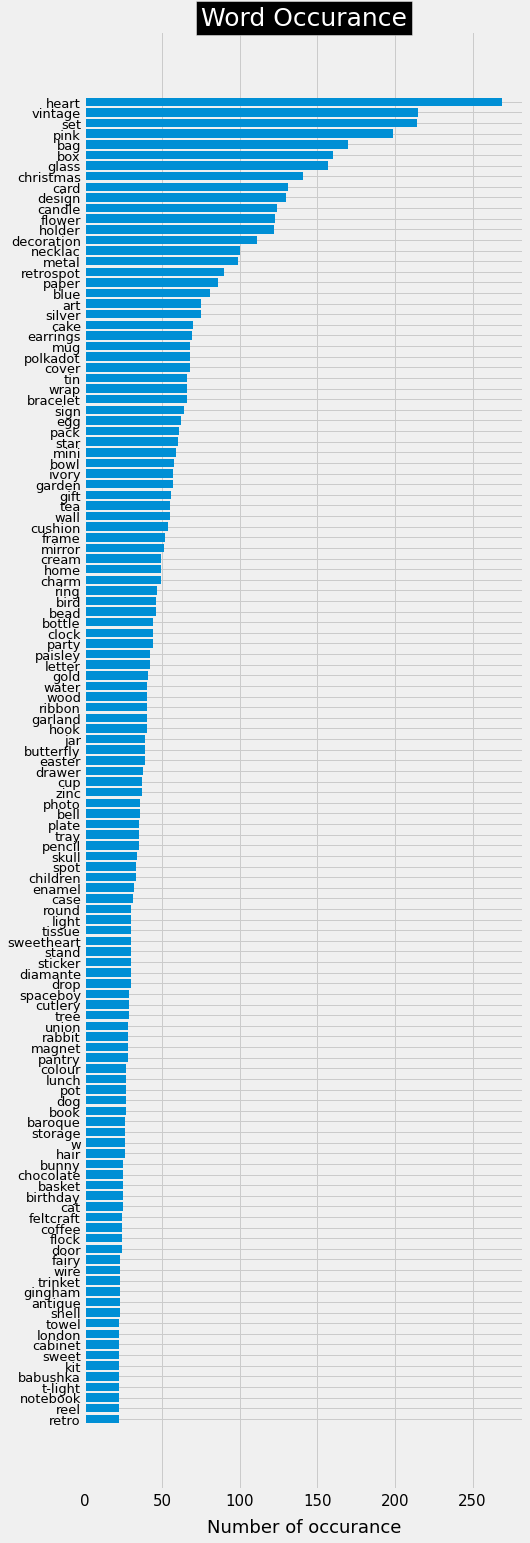

In [15]:
key.Analyzer(df)

In [47]:
list_products = key.Preserved_words(df)

Number of keywords in the variable 'Description': 1604


In [57]:
threshold = [0, 1, 2, 3, 5, 10]

# Getting the description.
liste_produits = df_cleaned['Description'].unique()

# Creating the product and word matrix.
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = liste_produits
    

label_col = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
        
    label_col.append(col)
    X.loc[:, col] = 0
    
for i, prod in enumerate(liste_produits):
    prix = df_cleaned[df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    
    while prix > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, label_col[j-1]] = 1

In [58]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<.<1       726                 
1<.<2       995                 
2<.<3       737                 
3<.<5       739                 
5<.<10      594                 
.>10        288                 


In [109]:
xx = pd.DataFrame(X['heart'])
xx = xx.dropna()
xx

,heart
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
4074,SET 10 CARDS SNOWY ROBIN 17099
4075,SET 10 CARDS SWIRLY XMAS TREE 17104
4076,"LETTER ""U"" BLING KEY RING"
4077,CREAM HANGING HEART T-LIGHT HOLDER


In [81]:
X

,heart,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,WHITE HANGING HEART T-LIGHT HOLDER,0,0,0,1,0,0
1,WHITE METAL LANTERN,0,0,0,1,0,0
2,CREAM CUPID HEARTS COAT HANGER,0,0,0,1,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,0,0,0,0,1,0
4,RED WOOLLY HOTTIE WHITE HEART.,0,0,0,0,1,0
...,...,...,...,...,...,...,...
4074,SET 10 CARDS SNOWY ROBIN 17099,0,0,1,0,0,0
4075,SET 10 CARDS SWIRLY XMAS TREE 17104,0,0,1,0,0,0
4076,"LETTER ""U"" BLING KEY RING",1,0,0,0,0,0
4077,CREAM HANGING HEART T-LIGHT HOLDER,0,0,0,1,0,0


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(X)
x=x.toarray()

In [84]:
matrix = x

In [85]:
matrix

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.]])

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_clusters in range(3, 8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.8571428571428571
For n_clusters :  4 The average silhouette_score is :  0.8571428571428571
For n_clusters :  5 The average silhouette_score is :  0.8571428571428571
For n_clusters :  6 The average silhouette_score is :  0.8571428571428571
For n_clusters :  7 The average silhouette_score is :  0.8571428571428571


In [94]:
n_clusters = 5
sil_avg = -1
while sil_avg < 0.145:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  5 The average silhouette_score is :  0.8571428571428571


In [95]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    import matplotlib as mpl
    mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhoutte_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhoutte_values.sort()
        size_cluster_i = ith_cluster_silhoutte_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhoutte_values, alpha = 0.8)
        
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                 bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))
        
        y_lower = y_upper + 10

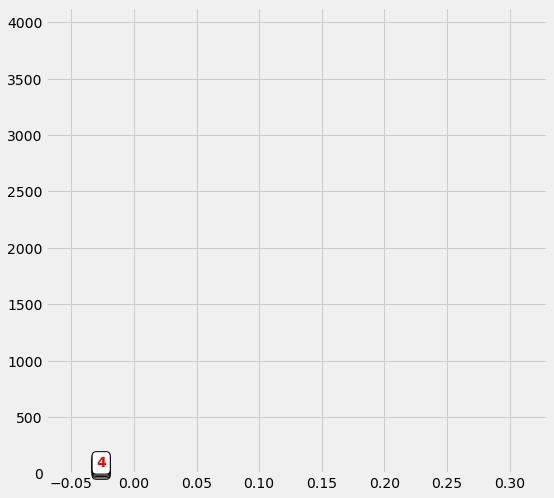

In [96]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [97]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurance) in list_products]

occurance = [dict() for _ in range(n_clusters)]

In [99]:
from random import randint
import random
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [100]:
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurances:
        words[s[0]] = s[1]
        
    wc = wordcloud.WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                             color_func = random_color_func, normalize_plurals=False)
    wc.generate_from_frequencies(words)
    ax1.imshow(wc, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))